In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import os
%matplotlib inline

In [8]:
df= pd.read_csv(r"C:\Users\auste\OneDrive\Desktop\Churn_Modelling.csv")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.shape

(10000, 14)

In [10]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5608,5609,15605113,Sutherland,518,France,Female,27,1,133801.49,1,1,1,143315.57,0
6996,6997,15614962,Pavlova,623,Spain,Female,50,2,87116.71,1,1,1,104382.11,0
6512,6513,15795429,Henderson,487,France,Male,24,7,133628.09,2,1,1,98570.01,0
981,982,15566156,Franklin,749,Germany,Female,44,0,71497.79,2,0,0,151083.80,0
6871,6872,15658067,Walker,636,Germany,Female,48,3,120568.41,1,1,0,190160.04,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [16]:
cat_cols=['Geography','Gender']
num_cols=[col for col in df.columns if col not in cat_cols]

In [17]:
for col in cat_cols:
    print(f'{col} : {df[col].unique()}')

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [18]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [19]:
df=pd.get_dummies(data=df, columns=['Geography'])

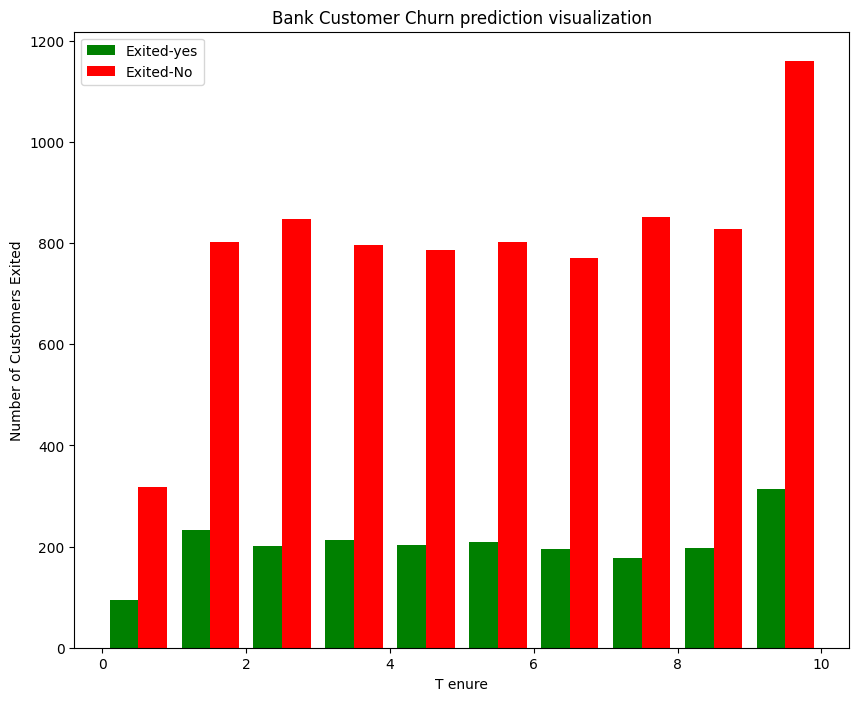

In [20]:
tenure_exited_0=df[df.Exited==0].Tenure
tenure_exited_1=df[df.Exited==1].Tenure

plt.figure(figsize=(10,8))
plt.xlabel('T enure')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([tenure_exited_1,tenure_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

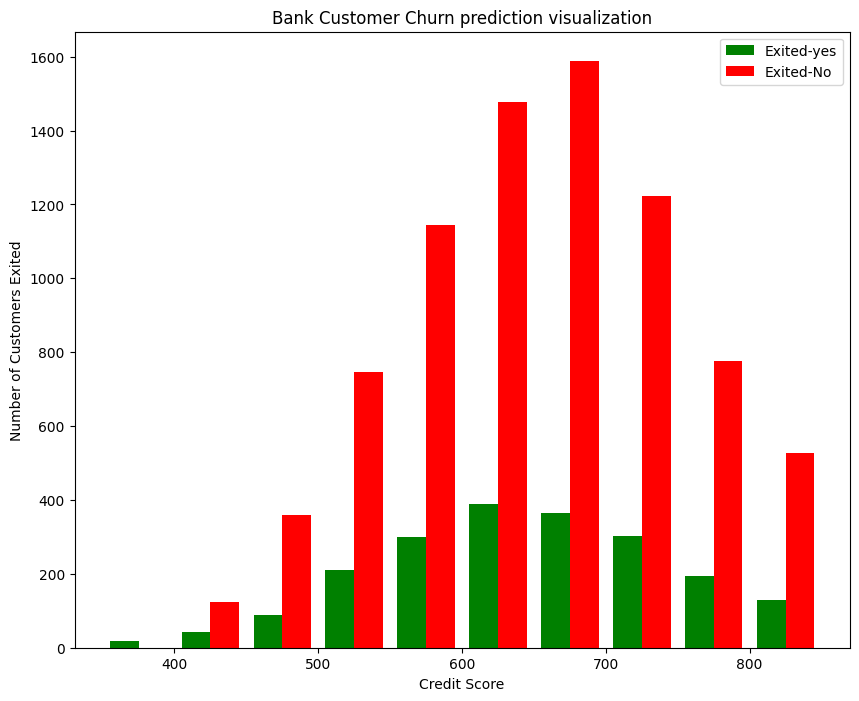

In [21]:
creditscore_exited_0=df[df.Exited==0].CreditScore
creditscore_exited_1=df[df.Exited==1].CreditScore

plt.figure(figsize=(10,8))
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([creditscore_exited_1,creditscore_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

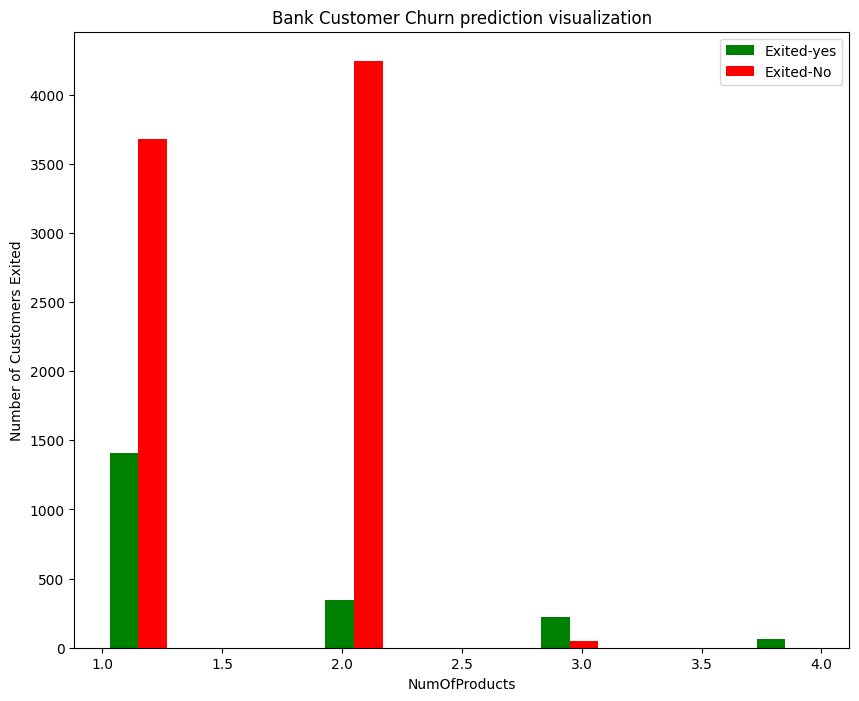

In [22]:
NumOfProducts_exited_0=df[df.Exited==0].NumOfProducts
NumOfProducts_exited_1=df[df.Exited==1].NumOfProducts

plt.figure(figsize=(10,8))
plt.xlabel('NumOfProducts')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([NumOfProducts_exited_1,NumOfProducts_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

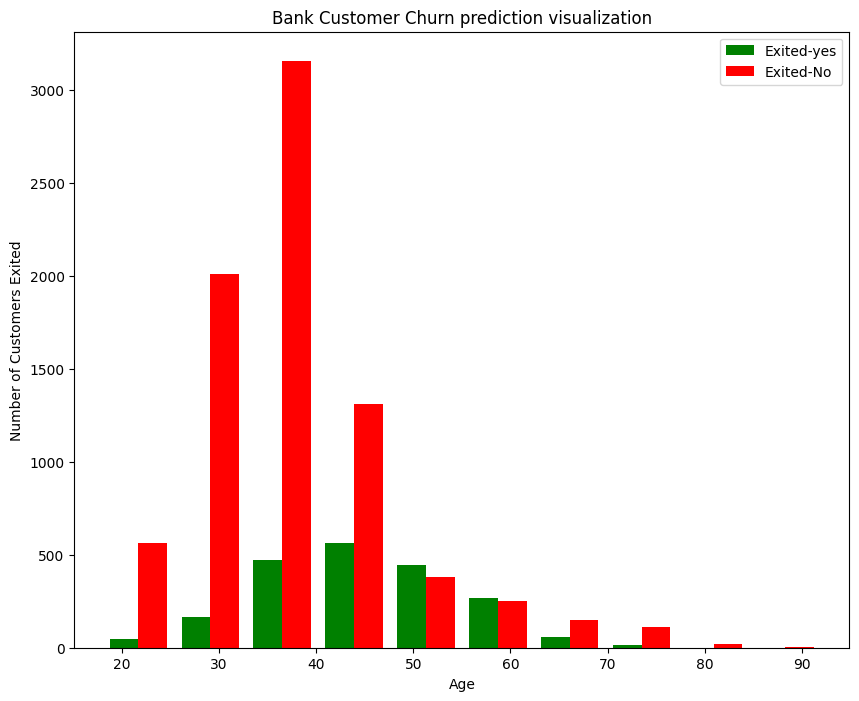

In [23]:
Age_exited_0=df[df.Exited==0].Age
Age_exited_1=df[df.Exited==1].Age

plt.figure(figsize=(10,8))
plt.xlabel('Age')
plt.ylabel('Number of Customers Exited')
plt.title('Bank Customer Churn prediction visualization')
plt.hist([Age_exited_1,Age_exited_0], color=['green','red'], label=['Exited-yes','Exited-No'])
plt.legend()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_France   10000 non-null  uint8  
 11  Geography_Germany  10000 non-null  uint8  
 12  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


In [25]:
# Scaling
cols_to_scale=['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary','Age']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [26]:
# Training
x=df.drop('Exited',axis=1)
y=df.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [27]:
def ANN(xtrain,xtest,ytrain,ytest,loss,weight):
    model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss=loss,
                 metrics=['accuracy'])
    
    if weight==-1:
        model.fit(xtrain,ytrain,epochs=100)
    else:
        model.fit(xtrain,ytrain,epochs=100,class_weight=weight)
    print()
    print(model.evaluate(xtest,ytest))
    print()
    ypred= model.predict(xtest)
    ypred=np.round(ypred)
    print()
    print(classification_report(ytest,ypred))
        
    return ypred

In [28]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
235/235 [==============================] - 1s 872us/step - loss: 0.5088 - accuracy: 0.7964
Epoch 2/100
235/235 [==============================] - 0s 968us/step - loss: 0.4661 - accuracy: 0.8004
Epoch 3/100
235/235 [==============================] - 0s 877us/step - loss: 0.4541 - accuracy: 0.8059
Epoch 4/100
235/235 [==============================] - 0s 906us/step - loss: 0.4461 - accuracy: 0.8083
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8112
Epoch 6/100
235/235 [==============================] - 0s 923us/step - loss: 0.4341 - accuracy: 0.8139
Epoch 7/100
235/235 [==============================] - 0s 933us/step - loss: 0.4283 - accuracy: 0.8144
Epoch 8/100
235/235 [==============================] - 0s 906us/step - loss: 0.4230 - accuracy: 0.8159
Epoch 9/100
235/235 [==============================] - 0s 879us/step - loss: 0.4182 - accuracy: 0.8157
Epoch 10/100
235/235 [==============================] - 0s 820us/step - los

235/235 [==============================] - 0s 981us/step - loss: 0.3383 - accuracy: 0.8592
Epoch 80/100
235/235 [==============================] - 0s 956us/step - loss: 0.3380 - accuracy: 0.8599
Epoch 81/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8588
Epoch 82/100
235/235 [==============================] - 0s 887us/step - loss: 0.3373 - accuracy: 0.8589
Epoch 83/100
235/235 [==============================] - 0s 877us/step - loss: 0.3381 - accuracy: 0.8583
Epoch 84/100
235/235 [==============================] - 0s 906us/step - loss: 0.3377 - accuracy: 0.8569
Epoch 85/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8561
Epoch 86/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8588
Epoch 87/100
235/235 [==============================] - 0s 890us/step - loss: 0.3376 - accuracy: 0.8607
Epoch 88/100
235/235 [==============================] - 0s 925us/step - loss: 0.337

Text(95.72222222222221, 0.5, 'Truth')

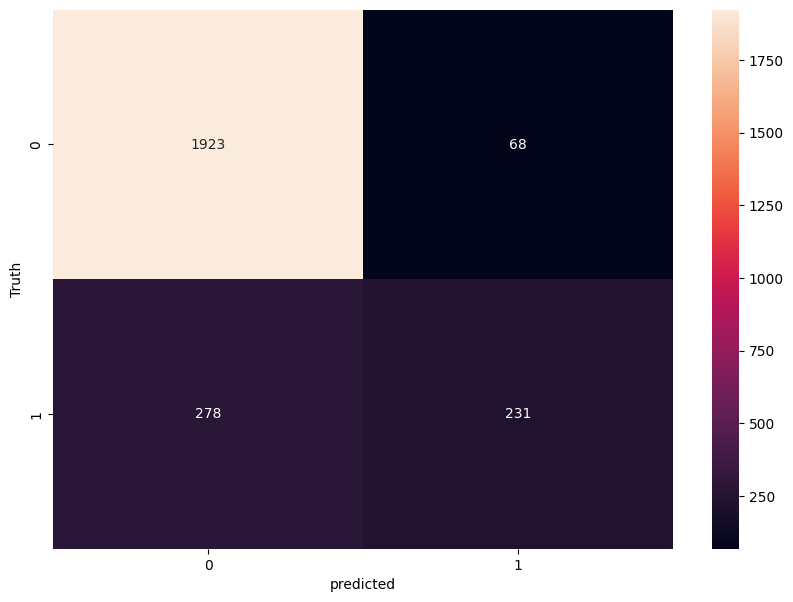

In [29]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

Handling Imbalanced Data

In [30]:
count_class_0, count_class_1 = df.Exited.value_counts()

In [31]:
df_class_0= df[df.Exited==0]
df_class_1= df[df.Exited==1]

In [32]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1])

df_test_under.shape

(4074, 13)

In [33]:
# Training
x=df_test_under.drop('Exited',axis=1)
y=df_test_under.Exited

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

In [34]:
ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
96/96 [==============================] - 0s 858us/step - loss: 0.6577 - accuracy: 0.6105
Epoch 2/100
96/96 [==============================] - 0s 909us/step - loss: 0.6318 - accuracy: 0.6599
Epoch 3/100
96/96 [==============================] - 0s 988us/step - loss: 0.6177 - accuracy: 0.6615
Epoch 4/100
96/96 [==============================] - 0s 972us/step - loss: 0.6078 - accuracy: 0.6720
Epoch 5/100
96/96 [==============================] - 0s 921us/step - loss: 0.5999 - accuracy: 0.6786
Epoch 6/100
96/96 [==============================] - 0s 932us/step - loss: 0.5924 - accuracy: 0.6881
Epoch 7/100
96/96 [==============================] - 0s 882us/step - loss: 0.5854 - accuracy: 0.6972
Epoch 8/100
96/96 [==============================] - 0s 910us/step - loss: 0.5794 - accuracy: 0.6972
Epoch 9/100
96/96 [==============================] - 0s 902us/step - loss: 0.5748 - accuracy: 0.7018
Epoch 10/100
96/96 [==============================] - 0s 853us/step - loss: 0.5703 - accura

96/96 [==============================] - 0s 914us/step - loss: 0.4637 - accuracy: 0.7751
Epoch 82/100
96/96 [==============================] - 0s 905us/step - loss: 0.4619 - accuracy: 0.7800
Epoch 83/100
96/96 [==============================] - 0s 856us/step - loss: 0.4626 - accuracy: 0.7732
Epoch 84/100
96/96 [==============================] - 0s 838us/step - loss: 0.4618 - accuracy: 0.7725
Epoch 85/100
96/96 [==============================] - 0s 824us/step - loss: 0.4624 - accuracy: 0.7791
Epoch 86/100
96/96 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.7771
Epoch 87/100
96/96 [==============================] - 0s 965us/step - loss: 0.4613 - accuracy: 0.7771
Epoch 88/100
96/96 [==============================] - 0s 886us/step - loss: 0.4612 - accuracy: 0.7787
Epoch 89/100
96/96 [==============================] - 0s 955us/step - loss: 0.4612 - accuracy: 0.7751
Epoch 90/100
96/96 [==============================] - 0s 911us/step - loss: 0.4610 - accuracy: 0.

Oversampling

In [35]:
df_class_1_over= df_class_1.sample(count_class_0,replace=True)

df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

df_test_over.shape

(15926, 13)

In [36]:
# Training
x=df_test_over.drop('Exited',axis=1)
y=df_test_over.Exited


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=15,stratify=y)

ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
374/374 [==============================] - 1s 873us/step - loss: 0.6584 - accuracy: 0.6031
Epoch 2/100
374/374 [==============================] - 0s 882us/step - loss: 0.6197 - accuracy: 0.6610
Epoch 3/100
374/374 [==============================] - 0s 876us/step - loss: 0.5961 - accuracy: 0.6868
Epoch 4/100
374/374 [==============================] - 0s 935us/step - loss: 0.5758 - accuracy: 0.7038
Epoch 5/100
374/374 [==============================] - 0s 870us/step - loss: 0.5606 - accuracy: 0.7152
Epoch 6/100
374/374 [==============================] - 0s 905us/step - loss: 0.5483 - accuracy: 0.7235
Epoch 7/100
374/374 [==============================] - 0s 895us/step - loss: 0.5365 - accuracy: 0.7348
Epoch 8/100
374/374 [==============================] - 0s 904us/step - loss: 0.5261 - accuracy: 0.7454
Epoch 9/100
374/374 [==============================] - 0s 904us/step - loss: 0.5170 - accuracy: 0.7516
Epoch 10/100
374/374 [==============================] - 0s 961us/step - l

Epoch 80/100
374/374 [==============================] - 0s 875us/step - loss: 0.4513 - accuracy: 0.7837
Epoch 81/100
374/374 [==============================] - 0s 833us/step - loss: 0.4515 - accuracy: 0.7848
Epoch 82/100
374/374 [==============================] - 0s 859us/step - loss: 0.4505 - accuracy: 0.7826
Epoch 83/100
374/374 [==============================] - 0s 897us/step - loss: 0.4511 - accuracy: 0.7837
Epoch 84/100
374/374 [==============================] - 0s 892us/step - loss: 0.4507 - accuracy: 0.7832
Epoch 85/100
374/374 [==============================] - 0s 843us/step - loss: 0.4509 - accuracy: 0.7826
Epoch 86/100
374/374 [==============================] - 0s 900us/step - loss: 0.4504 - accuracy: 0.7847
Epoch 87/100
374/374 [==============================] - 0s 858us/step - loss: 0.4506 - accuracy: 0.7822
Epoch 88/100
374/374 [==============================] - 0s 904us/step - loss: 0.4507 - accuracy: 0.7849
Epoch 89/100
374/374 [==============================] - 0s 856us

SMOTE

In [40]:
x=df.drop('Exited',axis=1)
y=df.Exited

from imblearn.over_sampling import SMOTE

smote= SMOTE(sampling_strategy='minority')

x_sm,y_sm=smote.fit_resample(x,y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.25,random_state=15,stratify=y_sm)

ypred=ANN(xtrain,xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
374/374 [==============================] - 1s 828us/step - loss: 0.6681 - accuracy: 0.5863
Epoch 2/100
374/374 [==============================] - 0s 853us/step - loss: 0.6126 - accuracy: 0.6668
Epoch 3/100
374/374 [==============================] - 0s 861us/step - loss: 0.5783 - accuracy: 0.7075
Epoch 4/100
374/374 [==============================] - 0s 843us/step - loss: 0.5533 - accuracy: 0.7261
Epoch 5/100
374/374 [==============================] - 0s 883us/step - loss: 0.5346 - accuracy: 0.7410
Epoch 6/100
374/374 [==============================] - 0s 860us/step - loss: 0.5202 - accuracy: 0.7488
Epoch 7/100
374/374 [==============================] - 0s 878us/step - loss: 0.5083 - accuracy: 0.7595
Epoch 8/100
374/374 [==============================] - 0s 965us/step - loss: 0.4997 - accuracy: 0.7626
Epoch 9/100
374/374 [==============================] - 0s 900us/step - loss: 0.4915 - accuracy: 0.7655
Epoch 10/100
374/374 [==============================] - 0s 917us/step - l

374/374 [==============================] - 0s 854us/step - loss: 0.4265 - accuracy: 0.7994
Epoch 80/100
374/374 [==============================] - 0s 832us/step - loss: 0.4273 - accuracy: 0.7991
Epoch 81/100
374/374 [==============================] - 0s 856us/step - loss: 0.4268 - accuracy: 0.7981
Epoch 82/100
374/374 [==============================] - 0s 839us/step - loss: 0.4265 - accuracy: 0.7966
Epoch 83/100
374/374 [==============================] - 0s 810us/step - loss: 0.4263 - accuracy: 0.7979
Epoch 84/100
374/374 [==============================] - 0s 827us/step - loss: 0.4263 - accuracy: 0.7976
Epoch 85/100
374/374 [==============================] - 0s 832us/step - loss: 0.4262 - accuracy: 0.7979
Epoch 86/100
374/374 [==============================] - 0s 832us/step - loss: 0.4264 - accuracy: 0.7982
Epoch 87/100
374/374 [==============================] - 0s 855us/step - loss: 0.4258 - accuracy: 0.7997
Epoch 88/100
374/374 [==============================] - 0s 824us/step - loss: